**ST7: TD1 & Project; Willelm Fuzeau; Alexandre Boyer; Nino Gagnebien; Gabriel Mansour**

*Its obligatory to load up clean_prices.csv, Caps.csv before run the code.*

Start with 2.

# DONT RUN THIS; you have already the Final Clean price Table! Here is our Preprocess to Get the clean prices

## Get Data from YahooFinance

In [ ]:
import pandas as pd
import yfinance as yf

#path CSV
csv_file_path = '/content/Tickers.csv'

#CSV to df
df_tickers = pd.read_csv(csv_file_path)

#extract ticker list
tickers = df_tickers['Tickers'].tolist()

#start and end date
start_date = '2002-12-31'
end_date = '2024-01-31'

#initialice empy frame for our data
df_prices = pd.DataFrame()

#list for tickers without data
failed_tickers = []

#load historical data for all tickers
for ticker in tickers:
    try:
        #take historical data for current ticker
        data = yf.download(ticker, start=start_date, end=end_date, progress = False)
        #get closing price
        close_prices = data['Close']
        #column name
        close_prices.name = ticker
        #add closing prices to the frame
        if df_prices.empty:
            df_prices = close_prices
        else:
            df_prices = pd.merge(df_prices, close_prices, left_index=True, right_index=True, how='outer')
    except Exception as e:
        print(f"The following ticker don't exists: {ticker}: {e}")
        failed_tickers.append(ticker)

#show failed tickers
print("Tickers which couldnt be found in yfinance:", failed_tickers)
#show finale frame
print(df_prices)

In [ ]:
#check first few rows
df_prices.head()

In [ ]:
#no need to run, its just for testing
#td1_graph_prices= df_prices.loc['2010-12-31':'2024-01-31']
#td1_graph_prices.head()

## Looking for Null-Values & Clean Dataset

## Preprocess to know price table better, **not necessary to run**.

In [ ]:
#Not Obligatory to run this cell

#lets see what in ourframe now
#df_prices.describe()

It seems like NAN rows will not counted.

In [ ]:
#Not Obligatory to run this cell
#verify shape and the fact that we don't miss values
df_prices.info()
#detect missing or NaN (Not a Number) values in a DataFrame
print('\n')
print("Each element is True if the corresponding element in the original DataFrame is missing (NaN) and False otherwise")
missing_values=df_prices.isna()
print(missing_values)

We see a lot of TRUE expressions here, we should count the Null-Values column by column

In [ ]:
#Not Obligatory to run this cell
#safe null_columns
null_columns = [column for column, is_null in df_prices.isnull().any().items() if is_null]
#print(null_columns)

In [ ]:
#Not Obligatory to run this cell
#to get a deeper look into null values
find_null_prices = [ticker for ticker in null_columns if ticker in df_prices.columns]
null_value_equities = df_prices[find_null_prices]
null_value_equities.to_excel('/content/null_values.xlsx', index = False)
#print(null_value_equities)

In [ ]:
#Not Obligatory to run this cell
#check for null values
#null_check = df_prices.isnull().any()
num_of_null_val_cols=0
null_counts = df_prices.isnull().sum()
for column, count in null_counts.items():
  if count>0:
    num_of_null_val_cols =num_of_null_val_cols+1
    print(f"'{column}' contains {count} null-values.")
print('\n')
print(num_of_null_val_cols)

## Generate clean price-table for our Market replication. First we drop all equities out which have no prices. Afterwards we Fill daily Gaps in the Data

In [ ]:
#This cell is to remove every column which consists at least one NaN value, dont need this anymore, but let it here because you never know
'''new data_frame
df_cleaned = df_prices.dropna(axis =1, how='any')
#check shape
df_cleaned.info()
#check for null
null_check = df_cleaned.isnull().any()
for column, has_null in null_check.items():
    if has_null:
        print(f"'{column}' contains Null-Values.") #if nothing prints out => no null-value columns
#check first few rows
df_cleaned.head()'''

In [ ]:
#FIRST LEVEL
#number of rows, since our timerange consists 5306 rows
c = 5306
#calculate the number on NaN-values for each column
null_counts = df_prices.isnull().sum()
#list of columns that consists c null-values(when we have no prices => Out!)
columns_to_drop = null_counts[null_counts == 5306].index.tolist()
#Out!
df_prices_cleaned = df_prices.drop(columns=columns_to_drop)
#cleaned dataframe(consists old dataframe without columns that have no prices)
#print(df_prices_cleaned)

In [ ]:
print(df_prices_cleaned.head())

In [ ]:
#get excel file with cleaned data set for SECOND LEVEL CLEANING
df_prices_cleaned.to_excel('/content/price_table.xlsx', index = True)

## Drop equities out with **to many gaps and not reasonable prices**

In [ ]:
"""#Since we had a look in the data, we found out, that some equities dont show reasonable prices, or to many gaps, for the few Stocks with some missing dates we fix them by hand
import pandas as pd
#file path
file_path = '/content/price_table.csv'

#this prices has no equities included which haven't prices, and we filled the daily gaps for some equities
prices_1=pd.read_csv(file_path, sep=';', parse_dates=[0], index_col=0, decimal = ',')
#show me first few rows
print(prices_1.head())"""

In [ ]:
"""#drop equities out which have to many gaps
columns_to_drop=['BMC', 'HNZ', 'PBG', 'SOV', 'BLS', 'BOL', 'KRI', 'CIN']
prices_dropped = prices_1.drop(columns = columns_to_drop)
print(prices_dropped.head())"""

In [ ]:
"""#fill rest of NaN-values with zeros
prices = prices_dropped.fillna(0)
#show me
print(prices.head())"""

In [ ]:
"""prices.to_excel('/content/prices.xlsx', index = True)"""

## drop equities out with obvious price Error's which leads to very high returns(1260%)

In [ ]:
"""import pandas as pd
#file path
file_path = '/content/prices.csv'
#get final price table
prices=pd.read_csv(file_path, sep=';', parse_dates=[0], index_col=0, decimal = ',')
#show me first few rows
print(prices.head())"""

In [ ]:
"""#drop equities out which have to many gaps
columns_to_drop=['KRI', 'CIN']
prices_2_drop = prices.drop(columns = columns_to_drop)
clean_prices = prices_2_drop
print(clean_prices.head())"""

In [ ]:
"""#path CSV
#csv_file_path = '/content/check.csv'

#CSV to df
#out_out_out = pd.read_csv(csv_file_path)

#extract ticker list
#drop_out = out_out_out['Tickers'].tolist()
#print(drop_out)"""

In [ ]:
clean_prices.to_excel('/content/clean_prices.xlsx', index = True)

# 1. Upload the clean_price CSV

In [ ]:
import pandas as pd
#file path
file_path = '/content/clean_prices.csv'
#get final price table
prices=pd.read_csv(file_path, sep=';', parse_dates=[0], index_col=0, decimal = ',')
#show me first few rows
print(prices.head())

#2. Adjustment of market caps after removing some stocks

In [ ]:
#import Market caps from Romain
import pandas as pd
#file path
file_path = '/content/Caps.csv'
#read csv as data frame
df_caps=pd.read_csv(file_path, sep=';', parse_dates=[0], index_col=0, decimal=',')
print(df_caps.head())

In [ ]:
"""#well-definedness for caps. every day has to be one in sum
row_sums = df_caps.sum(axis=1)
print(row_sums)"""

In [ ]:
"""print("yfinance table dimension")
print(prices.shape[0])
print(prices.shape[1])
print("market caps dimension")
print(df_caps.shape[0])
print(df_caps.shape[1])"""

reduce caps dimension to dimesion of prices

In [ ]:
#common columns of yfinance prices and marketcaps
#extract col names to index objects
columns_prices = prices.columns
columns_df_caps = df_caps.columns
#intersection
common_cols = columns_prices.intersection(columns_df_caps)

#filter both frames
prices= prices[common_cols]
df_caps= df_caps[common_cols]

#dimension check - this time df_caps and df_cleaned should have the same col dimension
print("yfinance table dimension")
print(prices.shape[0])
print(prices.shape[1])
print("market caps dimension")
print(df_caps.shape[0])
print(df_caps.shape[1])
df_caps.head()

In [ ]:
"""#check if the column names are the same in both tables
if len(prices.columns) != len(df_caps.columns):
  print("number of columns are not the same.")
else:
  if all(prices.columns == df_caps.columns):
    print("column names are the same.")
  else:
    print("column names are not the same.")"""

So now we have our reduced weight-set that we want to consider. We start now to rescale the weights

In [ ]:
#Where are we
#every day has to be one in sum
row_sums = df_caps.sum(axis=1)
print(row_sums)

In [ ]:
#scaling factor
df_caps =df_caps.apply(pd.to_numeric, errors='coerce')
sum_weights_per_month = df_caps.sum(axis=1)
scaling_factor = 1/sum_weights_per_month
print(scaling_factor)

In [ ]:
#scale our weights
df_caps= df_caps.multiply(scaling_factor, axis = 'index')
print(df_caps.sum(axis=1))

In [ ]:
#show me table with new weights
df_caps.head()

Finally we got our New weights.

In [ ]:
#no need to run this cell, its just for a check
#start_date_t = '2010-12-31'
#end_date_t = '2024-01-31'
#print(df_caps.index.min())
#print(df_caps.index.max())
#td1_graph= df_caps.loc[start_date_t:end_date_t]
#print(td1_graph.head())

#3. Calculate Returns

In [ ]:
import numpy as np

returns = np.log(1+ prices.pct_change())
returns2 = np.log(1+ prices.pct_change())#to map later the correct index
#print(returns)

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [ ]:
import numpy as np
#set inf and -inf to 0 in the whole data DataFrame
returns.replace([np.inf, -np.inf],0, inplace = True)
#check_inf= returns.loc['2003-12-02', 'NRG']
#print(check_inf)
#print(returns)

In [ ]:
#fill rest of NaN-values with zeros
returns_not_nan = returns.fillna(0)
#print(returns_not_nan.info())
#print(returns_not_nan)

In [ ]:
#import numpy as np
#just to check
#check_inf= returns.loc['2003-12-02', 'NRG']
#print(check_inf==np.inf)

In [ ]:
#just a check
#returns.to_excel('/content/returns.xlsx', index = True)

#4. Calculate $r_t^{SPX}$ = $\sum_{i=1}^{N}$ $w_t^i * r_t ^i$

In [ ]:
import pandas as pd
#align date format von mul(.)
# ONLY RUN ONCE
df_caps.index = pd.to_datetime(df_caps.index)
df_caps.index = df_caps.index.to_period('M')
returns_not_nan.index = pd.to_datetime(returns_not_nan.index)
returns_not_nan.index = returns_not_nan.index.to_period('M')
#print(df_caps.head())
#print(returns_not_nan.head())

In [ ]:
#calculate weighted returns
result_df = returns_not_nan.copy()
for index in returns_not_nan.index:
  if index in df_caps.index:
    result_df.loc[index] = returns_not_nan.loc[index]*df_caps.loc[index]
result_df

In [ ]:
#reindex
result_df.index = returns2.index
print(result_df)

In [ ]:
#sum per day for SPX returns*weight
#sum over columns
row_sums = result_df.sum(axis=1)
#return of spx over time
final_df = pd.DataFrame(row_sums, columns=['r_spx_over_time'])
#check dim
final_df.info()
#check
print(final_df.head())

Below we can see the returns, have a look at 2008 and 2019, lehmann and covid

In [ ]:
"""final_df.to_excel('/content/returns_check.xlsx', index = True)"""

In [ ]:
import matplotlib.pyplot as plt

final_df.plot(figsize=(10, 6))
plt.title('Returns SPX')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()


#5. Get the graph
$P_0= Init. Invest$\
$P_1 = P_0 * (1+ r_{1}^{SPX})$\
$P_t = P_{t-1} * (1+ r_{t}^{SPX})$

In [ ]:
#investment
investment_start = 100
#investment over time
investment_over_time = investment_start * (final_df + 1).cumprod()
investment_over_time.iloc[0] = investment_start
investment_over_time.head()
plt.hist(final_df, bins = 1000)
plt.show()

sum =0

for i in np.array(final_df):
  if i < 0.05 and i > -0.05:
    sum +=1
print(100*sum/len(final_df))

#6. Graph **SPX**

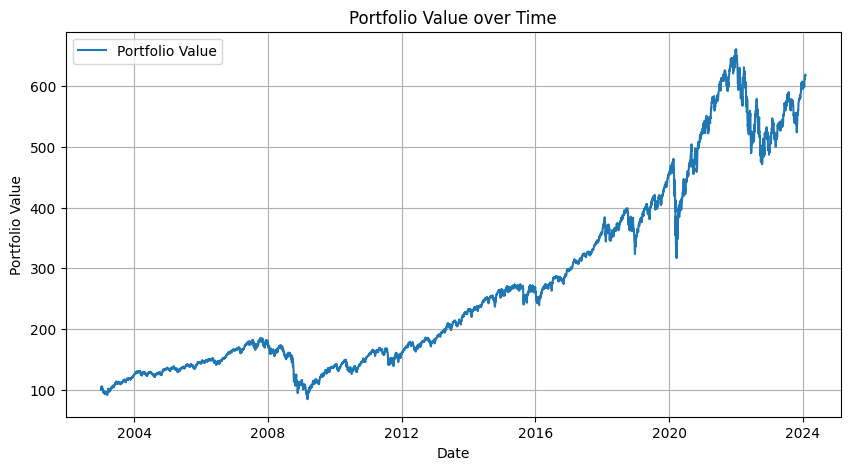

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#plot
plt.figure(figsize=(10, 5))
plt.plot(investment_over_time.index, investment_over_time['r_spx_over_time'], label='Portfolio Value')
plt.title('Portfolio Value over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid(True)
plt.show()

#7. **Key Risk Indicators** of our Replicated SPX



## Annual performance via *CAGR* = $(\frac{Capital_{End}}{Capital_{Start}})^{\frac{1}{n}}-1$

here: 9.0 % for our SPX

In [ ]:

#get years
start_date = '2002-12-31'
end_date = '2024-01-31'
from datetime import datetime
date1 = datetime.strptime(start_date, '%Y-%m-%d')
date2 = datetime.strptime(end_date, '%Y-%m-%d')
date_diff = (date2-date1).days*252/365
t = (date_diff/252)
#define capital at time zero and time T
C_0=investment_over_time.iloc[0]
C_T=investment_over_time.iloc[-1]
#CAGR
performance= (C_T/C_0)**(1/t) - 1
#print(date1)
#print(date2)
print(performance*100)

r_spx_over_time    9.014285
dtype: float64


## Annualized Volatility

here: 18.6% four our SPX

In [ ]:
#code here
#daily vol
daily_vol = np.std(final_df, ddof=1)
#yearly vol
ann_vol= daily_vol*np.sqrt(252)
print(ann_vol * 100)

r_spx_over_time    18.639067
dtype: float64


## Max Drawdown

here: -54%

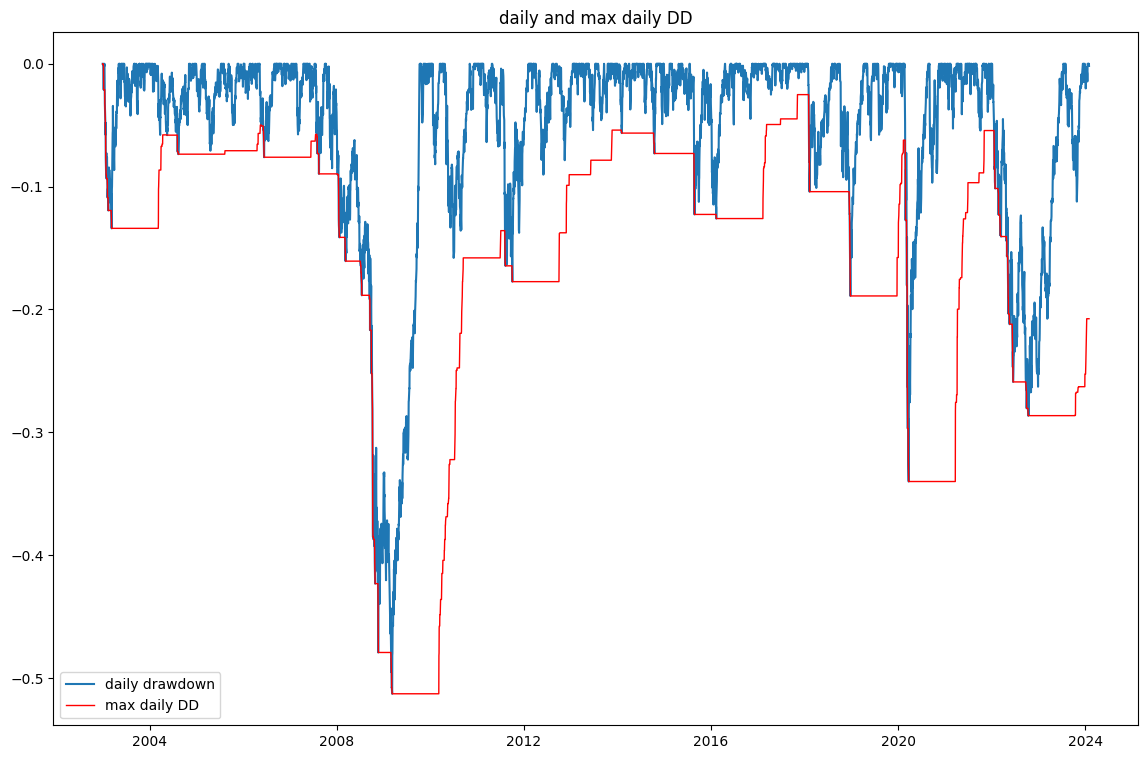

In [ ]:
#mDD
import pandas as pd
import matplotlib.pyplot as pp
#we are going to use a trailing 252 trading-day window
trading_days=252
#calculate the max drawdown in the past window days for each day in the series
#use min_periods=1 if you want to let the first 252 days data have an expanding window
roll_max = investment_over_time.rolling(trading_days,min_periods = 1).max()
daily_dd= investment_over_time/roll_max - 1.0
#next we calculate the minimum (negative) daily drawdown in that window
#again, use min_periods=1 if you want to allow the expanding window
max_daily_drawdown = daily_dd.rolling(trading_days, min_periods=1).min()
#plot
plt.figure(figsize=(14, 9))
plt.plot(daily_dd, label='daily drawdown')
plt.plot(max_daily_drawdown, label='max daily DD', color='red',linewidth=1)
plt.title('daily and max daily DD')
plt.legend()
plt.show()

In [ ]:
#cumulative-max of returns
cum_returns = investment_over_time.cummax()
#running max of cumulative return
drawdown = (investment_over_time - cum_returns)/cum_returns
max_draw_down = drawdown.min()
print(max_draw_down*100)

r_spx_over_time   -54.30428
dtype: float64


## VaR

here: -1.7 %

In [ ]:
var_hist=final_df.quantile(0.05)
print(var_hist*100)

r_spx_over_time   -1.707256
Name: 0.05, dtype: float64


## Sharpe ratio

here : 0.48

In [ ]:
print(performance / ann_vol)

r_spx_over_time    0.483623
dtype: float64


# Project

## Risk based portfolios (EW, ERB, IV, MV)


In [ ]:
# Risk based
import numpy as np
import matplotlib.pyplot as plt

returns = np.array(returns_not_nan)
returns = np.delete(returns, (0), axis=0)

final_df = np.reshape(np.array(final_df), (np.array(final_df).shape[0],))
final_df = np.delete(final_df, 0)

years = returns.shape[0]/252
print(returns.shape)
print(final_df.shape)

(5305, 488)
(5305,)


Annualized returns :  6.4452400884792205 %
Annualized volatility  :  21.560148115426312 %
Max drawdown :  -69.27566371185861 %
VaR -1.9750633722714375 %
Tracking error 0.42706807157849536 %


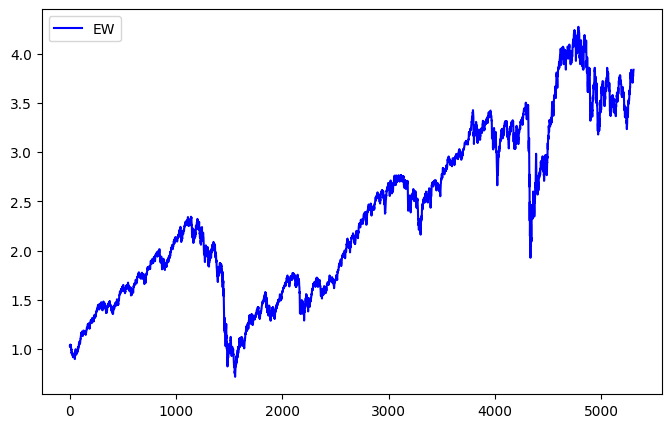

In [ ]:
# EW
vec1 = np.ones(returns.shape[1])
r_EW =[]

for i in range(returns.shape[0]):
  r = []
  for j in range(returns.shape[1]):
    if returns[i,j] != 0:
      r.append(returns[i,j])
  w = np.ones(len(r)) / len(r)
  r_EW.append(np.matmul(r,w))

r_EW = np.array(r_EW)
investment_EW = np.cumprod(1+r_EW)

# CAGR
print("Annualized returns : ", 100 * ((investment_EW[-1]/investment_EW[0])**(1/years) - 1), "%")

# Annualized volatility
print("Annualized volatility  : ", 100 * np.sqrt(252) * np.std(r_EW), "%")

# Max drawdown
cum_max = np.maximum.accumulate(investment_EW)
drawdown = (investment_EW - cum_max)/cum_max
max_draw_down = drawdown.min()
print("Max drawdown : ", max_draw_down * 100, "%")

# VaR
print("VaR", 100 * np.quantile(r_EW, 0.05), "%")

# Tracking error
print("Tracking error", 100 * np.sqrt(np.sum(np.square(np.subtract(r_EW,final_df)))/len(r_EW)), "%")

plt.figure(figsize=(8,5))
plt.plot(investment_EW, "blue", label = "EW")
plt.legend()
plt.show()

Annualized returns :  6.323853213072561 %
Annualized volatility  :  18.055259219003307 %
Max drawdown :  -58.39966232823419 %
VaR -1.654404232476804 %
Tracking error 0.3208428540549519 %


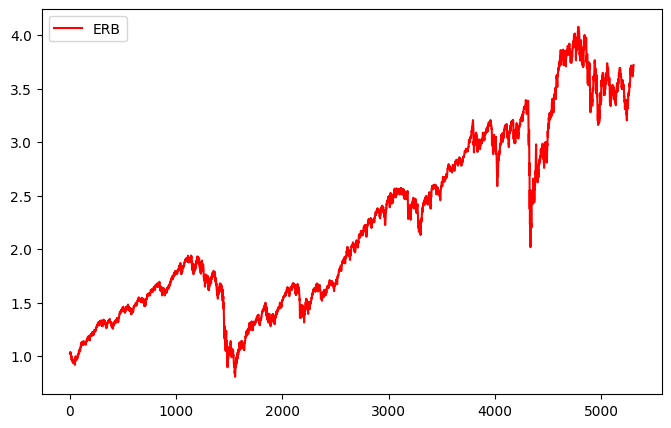

In [ ]:
# ERB
#vol = np.std(returns, axis=0)
vec1 = np.ones(returns.shape[1])

no_zeros = []
for j in range(returns.shape[1]):
  list = []
  for i in range(returns.shape[0]):
    if returns[i,j] != 0:
      list.append(returns[i,j])
  no_zeros.append(list)

sigmas = []
for j in range(returns.shape[1]):
  values_for_sig = np.array(no_zeros[j])
  sigmas.append(np.std(values_for_sig))
sigmas = np.array(sigmas)


lambda_inv = np.diag(1/sigmas)
w_erb = np.matmul(lambda_inv,vec1)/np.matmul(vec1.transpose(),np.matmul(lambda_inv,vec1))
r_ERB = np.matmul(returns,w_erb)

investment_ERB = np.cumprod(1+r_ERB)

# CAGR
print("Annualized returns : ", 100 * ((investment_ERB[-1]/investment_ERB[0])**(1/years) - 1), "%")

# Annualized volatility
print("Annualized volatility  : ", 100 * np.sqrt(252) * np.std(r_ERB), "%")

# Max drawdown
cum_max = np.maximum.accumulate(investment_ERB)
drawdown = (investment_ERB - cum_max)/cum_max
max_draw_down = drawdown.min()
print("Max drawdown : ", max_draw_down * 100, "%")

# VaR
print("VaR", 100 * np.quantile(r_ERB, 0.05), "%")

# Tracking error
print("Tracking error", 100 * np.sqrt(np.sum(np.square(np.subtract(r_ERB,final_df)))/len(r_ERB)), "%")

plt.figure(figsize=(8,5))
plt.plot(investment_ERB, "red", label="ERB")
plt.legend()
plt.show()

Annualized returns :  5.469317417782782 %
Annualized volatility  :  13.363663050914528 %
Max drawdown :  -44.90273389352436 %
VaR -1.2095661179745105 %
Tracking error 0.42196188544919716 %


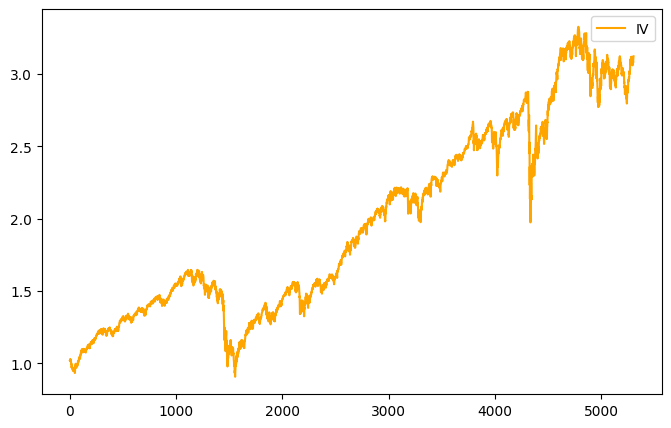

In [ ]:
# IV
vec1 = np.ones(returns.shape[1])

lambda2_inv = np.diag((1/sigmas)**2)
w_iv = np.matmul(lambda2_inv,vec1)/np.matmul(vec1.transpose(),np.matmul(lambda2_inv,vec1))
r_IV = np.matmul(returns,w_iv)

investment_IV = np.cumprod(1+r_IV)

# CAGR
print("Annualized returns : ", 100 * ((investment_IV[-1]/investment_IV[0])**(1/years) - 1), "%")

# Annualized volatility
print("Annualized volatility  : ", 100 * np.sqrt(252) * np.std(r_IV), "%")

# Max drawdown
cum_max = np.maximum.accumulate(investment_IV)
drawdown = (investment_IV - cum_max)/cum_max
max_draw_down = drawdown.min()
print("Max drawdown : ", max_draw_down * 100, "%")

# VaR
print("VaR", 100 * np.quantile(r_IV, 0.05), "%")

# Tracking error
print("Tracking error", 100 * np.sqrt(np.sum(np.square(np.subtract(r_IV,final_df)))/len(r_IV)), "%")

plt.figure(figsize=(8,5))
plt.plot(investment_IV, "orange", label = "IV")
plt.legend()
plt.show()

For ERB sliding portfolio
Annualized returns :  6.52722879261094 %
Annualized volatility  :  22.159884117573306 %
Max drawdown :  -72.68784285882998 %
VaR -2.0204242591872226 %
Tracking error 0.4994679505709882 %

For IV sliding portfolio:
Annualized returns :  5.961408951683356 %
Annualized volatility  :  20.944292581973606 %
Max drawdown :  -70.39915961050903 %
VaR -1.882966082813374 %
Tracking error 0.4569882295879307 %


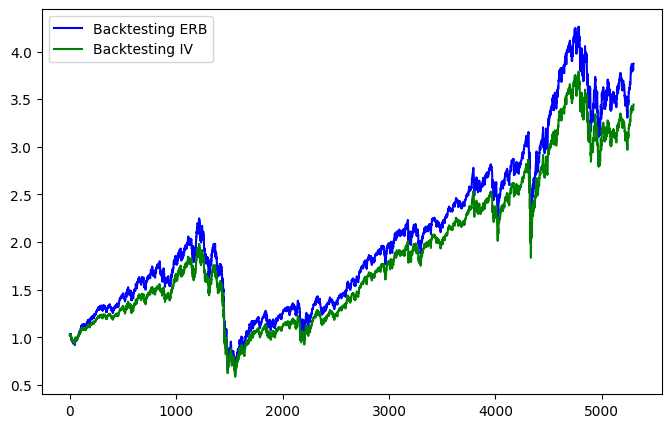

In [ ]:
# Sliding ERB and Sliding IV

num_sliding = 500
delta_t = 15

sum_t = 0

# Replacing the absent data with IV data. This happens because we need at least num_sliding prior prices to compute the std matrix.
r_ERB_sliding = r_ERB[0:num_sliding]
r_IV_sliding = r_IV[0:num_sliding]

while num_sliding + sum_t + delta_t < returns.shape[0]:

  # Checking if the elements on the row are non zero.
  valid_index = []
  for j in range(returns.shape[1]):
    if returns[num_sliding+sum_t,j] != 0:
      valid_index.append(j)

  # Keeping the column only if the previous num_sliding elements are non zero.
  valid_index2 = []
  for j in valid_index:
    for i in range(sum_t,num_sliding+sum_t):
      if returns[i,j] == 0:
        break;
      else:
        if i == num_sliding+sum_t-1:
          valid_index2.append(j)


  final_vectors = []
  valid_index3 = []
  for j in valid_index2:
    if np.std(returns[sum_t:num_sliding+sum_t,j]) != 0:
      valid_index3.append(j)
      final_vectors.append(returns[sum_t:num_sliding+sum_t,j])
  final_vectors = np.array(final_vectors)


  sigmas_sliding = []
  for i in range(len(valid_index3)):
    values_for_sig = final_vectors[i,:]
    sigmas_sliding.append(np.std(values_for_sig))
  sigmas_sliding = np.array(sigmas_sliding)

  lambda_inv = np.diag(1/sigmas_sliding)
  lambda2_inv = np.diag((1/sigmas_sliding)**2)

  vec1 = np.ones(len(valid_index3))

  w_erb = np.matmul(lambda_inv,vec1)/np.matmul(vec1.transpose(),np.matmul(lambda_inv,vec1))
  w_iv = np.matmul(lambda2_inv,vec1)/np.matmul(vec1.transpose(),np.matmul(lambda2_inv,vec1))

  vectors = []
  for j in valid_index3:
      vectors.append(returns[num_sliding+sum_t:num_sliding+sum_t+delta_t,j])
  vectors = np.array(vectors).transpose()

  r_ERB_sliding = np.concatenate([r_ERB_sliding, np.matmul(vectors,w_erb)])
  r_IV_sliding = np.concatenate([r_IV_sliding, np.matmul(vectors,w_iv)])

  sum_t += delta_t

investment_ERB_sliding = np.cumprod(1+r_ERB_sliding)
investment_IV_sliding = np.cumprod(1+r_IV_sliding)

print("For ERB sliding portfolio")
# CAGR
print("Annualized returns : ", 100 * ((investment_ERB_sliding[-1]/investment_ERB_sliding[0])**(1/years) - 1), "%")

# Annualized volatility
print("Annualized volatility  : ", 100 * np.sqrt(252) * np.std(r_ERB_sliding), "%")

# Max drawdown
cum_max = np.maximum.accumulate(investment_ERB_sliding)
drawdown = (investment_ERB_sliding - cum_max)/cum_max
max_draw_down = drawdown.min()
print("Max drawdown : ", max_draw_down * 100, "%")

# VaR
print("VaR", 100 * np.quantile(r_ERB_sliding, 0.05), "%")

# Tracking error
print("Tracking error", 100 * np.sqrt(np.sum(np.square(np.subtract(r_ERB_sliding,np.delete(final_df, ([-i for i in range(1,final_df.shape[0]-r_ERB_sliding.shape[0]+1)])))))/len(r_ERB_sliding)), "%")


print("")


print("For IV sliding portfolio:")
# CAGR
print("Annualized returns : ", 100 * ((investment_IV_sliding[-1]/investment_IV_sliding[0])**(1/years) - 1), "%")

# Annualized volatility
print("Annualized volatility  : ", 100 * np.sqrt(252) * np.std(r_IV_sliding), "%")

# Max drawdown
cum_max = np.maximum.accumulate(investment_IV_sliding)
drawdown = (investment_IV_sliding - cum_max)/cum_max
max_draw_down = drawdown.min()
print("Max drawdown : ", max_draw_down * 100, "%")

# VaR
print("VaR", 100 * np.quantile(r_IV_sliding, 0.05), "%")

# Tracking error
print("Tracking error", 100 * np.sqrt(np.sum(np.square(np.subtract(r_IV_sliding,np.delete(final_df, ([-i for i in range(1,final_df.shape[0]-r_IV_sliding.shape[0]+1)])))))/len(r_IV_sliding)), "%")

plt.figure(figsize=(8,5))
plt.plot(investment_ERB_sliding, "blue", label="Backtesting ERB")
plt.plot(investment_IV_sliding, "green", label="Backtesting IV")
plt.legend()
plt.show()

Nombre de cas non inversibles :  0
Nombre de cas inversibles :  245
Pourcentage de cas non inversibles :  0.0 %
Annualized returns :  6.47091698415605 %
Annualized volatility  :  15.786275679450755 %
Max drawdown :  -46.01250804896135 %
VaR -1.4349220185140759 %
Sharpe ratio :  0.4099077651722088
Tracking error 1.0154827914575983 %


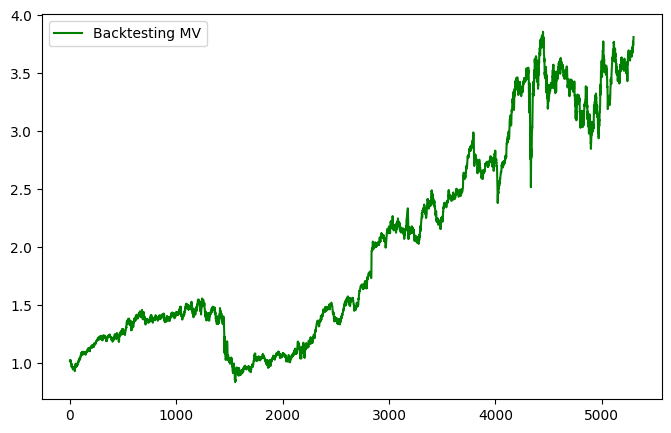

In [ ]:
# Sliding MV
num_sliding = 400
delta_t = 20

sum_t = 0

# Replacing the absent data with IV data. This happens because we need at least num_sliding prior prices to compute the covariance matrix.
r_MV_sliding = r_IV[0:num_sliding]
num_non_inv = 0
num_inv = 0


while num_sliding+sum_t+delta_t < returns.shape[0]:

  # Checking if the elements on the num_sliding+sum_t row are non zero.
  valid_index = []
  for j in range(returns.shape[1]):
    if returns[num_sliding+sum_t,j] != 0:
      valid_index.append(j)

  # Keeping the column only if the previous num_sliding elements are non zero.
  valid_index2 = []
  for j in valid_index:
    for i in range(sum_t,num_sliding+sum_t):
      if returns[i,j] == 0:
        break;
      else:
        if i == num_sliding + sum_t - 1:
          valid_index2.append(j)

  final_vectors = []
  for j in valid_index2:
    final_vectors.append(returns[sum_t:num_sliding+sum_t,j])
  final_vectors = np.array(final_vectors).transpose()

  cov_mat = np.cov(final_vectors.transpose())

  # Checking if the covariance matrix is invertible.
  if np.linalg.matrix_rank(cov_mat) == cov_mat.shape[0]:
      cov_inv = np.linalg.inv(cov_mat)
      vec1 = np.ones(len(valid_index2))

      w_mv = np.matmul(cov_inv,vec1)/np.matmul(vec1.transpose(),np.matmul(cov_inv,vec1))

      vectors = []
      for j in valid_index2:
        vectors.append(returns[num_sliding+sum_t:num_sliding+sum_t+delta_t,j])
      vectors = np.array(vectors).transpose()

      r_MV = np.matmul(vectors,w_mv)

      # Removing pathological cases.
      for i in r_MV:
        if np.abs(i) > 0.2:
          r_MV[r_MV == i] = 0

      # Adding delta_t days of returns.
      r_MV_sliding = np.concatenate([r_MV_sliding, r_MV])

      sum_t += delta_t
      num_inv += 1

  # Replacing absent data with neutral values if the covariance matrix is not inversible.
  else:
      r_MV_sliding = np.concatenate([r_MV_sliding, np.zeros(delta_t)])
      sum_t += delta_t
      num_non_inv += 1


print("Nombre de cas non inversibles : ", num_non_inv)
print("Nombre de cas inversibles : ", num_inv)
print("Pourcentage de cas non inversibles : ", 100*num_non_inv/(num_non_inv + num_inv), "%")

investment_MV_sliding = np.cumprod(1+r_MV_sliding)

# CAGR
print("Annualized returns : ", 100 * ((investment_MV_sliding[-1]/investment_MV_sliding[0])**(1/years) - 1), "%")

# Annualized volatility
print("Annualized volatility  : ", 100 * np.sqrt(252) * np.std(r_MV_sliding), "%")

# Max drawdown
cum_max = np.maximum.accumulate(investment_MV_sliding)
drawdown = (investment_MV_sliding - cum_max)/cum_max
max_draw_down = drawdown.min()
print("Max drawdown : ", max_draw_down * 100, "%")

# VaR
print("VaR", 100 * np.quantile(r_MV_sliding, 0.05), "%")

# Sharpe ratio
print("Sharpe ratio : ",  ((investment_MV_sliding[-1]/investment_MV_sliding[0])**(1/years) - 1)/ (np.sqrt(252) * np.std(r_MV_sliding)))

# Tracking error
print("Tracking error", 100 * np.sqrt(np.sum(np.square(np.subtract(r_MV_sliding,np.delete(final_df, ([-i for i in range(1,final_df.shape[0]-r_MV_sliding.shape[0]+1)])))))/len(r_MV_sliding)), "%")

plt.figure(figsize=(8,5))
plt.plot(investment_MV_sliding, "green", label = "Backtesting MV")
plt.legend()
plt.show()

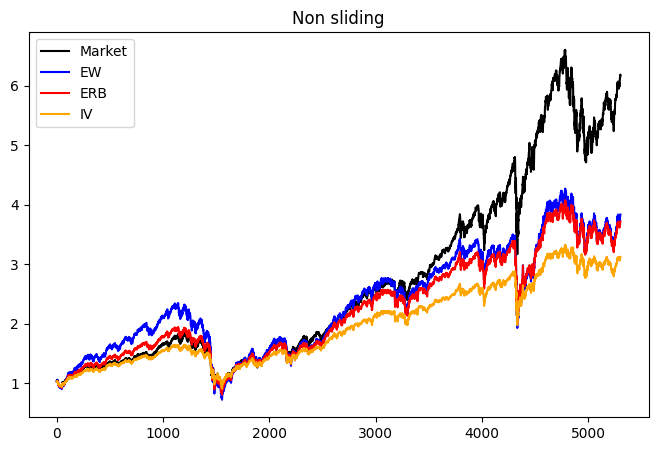

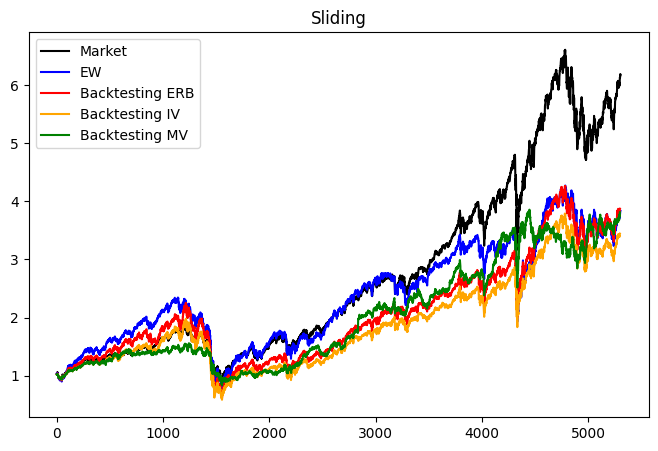

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(np.cumprod(1+final_df), "black", label = "Market")
plt.plot(np.cumprod(1+r_EW), "blue", label = "EW")
plt.plot(np.cumprod(1+r_ERB), "red", label="ERB")
plt.plot(np.cumprod(1+r_IV), "orange", label = "IV")
plt.title("Non sliding")
plt.legend()
plt.show()



plt.figure(figsize=(8,5))
plt.plot(np.cumprod(1+final_df), "black", label = "Market")
plt.plot(np.cumprod(1+r_EW), "blue", label = "EW")
plt.plot(np.cumprod(1+r_ERB_sliding), "red", label="Backtesting ERB")
plt.plot(np.cumprod(1+r_IV_sliding), "orange", label = "Backtesting IV")
plt.plot(np.cumprod(1+r_MV_sliding), "green", label = "Backtesting MV")
plt.title("Sliding")
plt.legend()
plt.show()

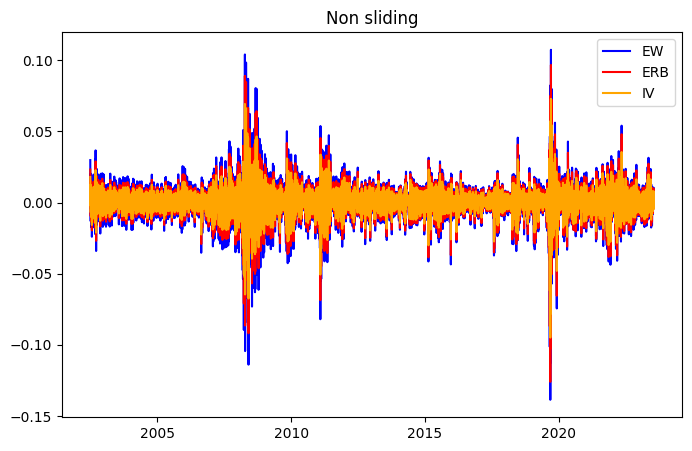

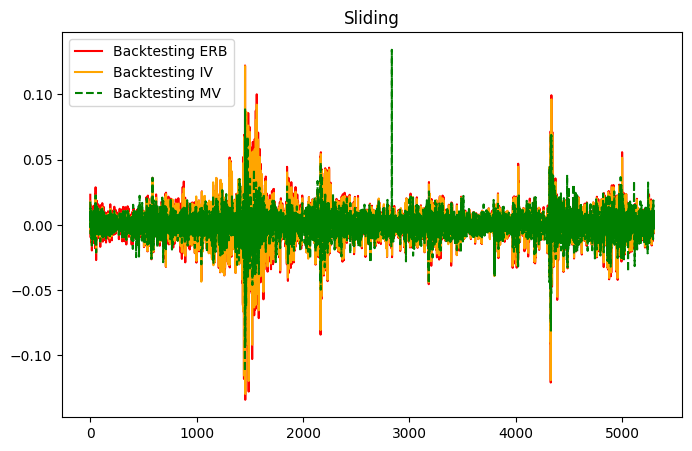

In [ ]:
X = []
for i in range(returns.shape[0]):
  X.append(2002.5 + i/252)
X = np.array(X)

plt.figure(figsize=(8,5))
plt.plot(X, r_EW, "blue", label = "EW")
plt.plot(X, r_ERB, "red", label = "ERB")
plt.plot(X, r_IV,"orange", label = "IV")
plt.title("Non sliding")
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(r_ERB_sliding, "red", label = "Backtesting ERB")
plt.plot(r_IV_sliding,"orange", label = "Backtesting IV")
plt.plot(r_MV_sliding,"g--", label = "Backtesting MV")
plt.title("Sliding")
plt.legend()
plt.show()


## Markowitz optimization porfolio (MVO, mean variance optimization)




In [ ]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

def optimize_portfolio_with_risk_aversion(expected_returns, cov_matrix, risk_aversion):

    num_assets = len(expected_returns)
    initial_weights = np.array([1.0 / num_assets] * num_assets)  # Initial guess for weights

    # Define constraints
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})  # Sum of weights equals 1

    # Define bounds for weights (between 0 and 1)
    bounds = tuple((0, 1) for _ in range(num_assets))

    # Define the objective function
    def objective_function(weights, expected_returns, cov_matrix, risk_aversion):
        portfolio_return = np.matmul(weights, expected_returns)
        portfolio_variance = np.matmul(weights.T, np.dot(cov_matrix, weights))
        return -portfolio_return + 0.5 * risk_aversion * portfolio_variance

    # Perform optimization
    result = minimize(objective_function, initial_weights, args=(expected_returns, cov_matrix, risk_aversion),
                      constraints=constraints, bounds=bounds)

    return result.x

Annualized returns :  11.97080347812638 %
Annualized volatility  :  26.00723568397441 %
Max drawdown :  -79.99197054822376 %
VaR -2.280229110860063 %
Tracking error 1.1617416288359272 %


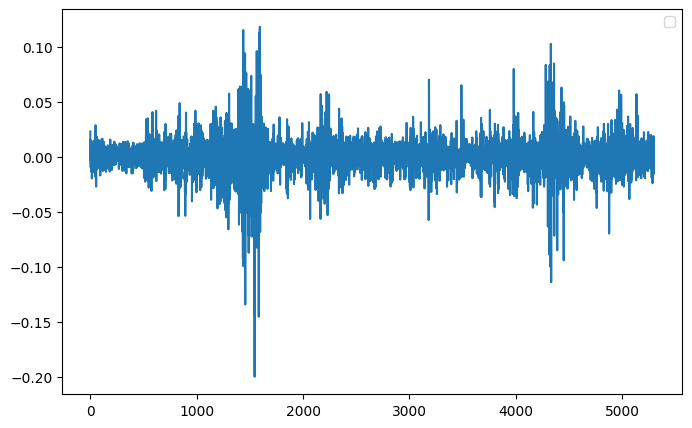

In [ ]:
# Markowitz optimization portfolio
import numpy as np
import matplotlib.pyplot as plt

returns = np.array(returns_not_nan)
returns = np.delete(returns, (0), axis=0)

years = returns.shape[0]/252

# Optimization period, i.e. on how many days do we compute our expected returns. We will also project our portfolio thus calculated on opti_period days into the future.
opti_period = 15

num_sliding = 500
sum_t = 0
risk_aversion = 30

# Replacing the absent data with IV data. This happens because we need at least num_sliding prior prices to compute the covariance matrix.
r_MVO_sliding = r_ERB[0:num_sliding]
num_non_inv = 0
num_inv = 0


while num_sliding + sum_t + opti_period < returns.shape[0]:

  # Checking if the elements on the row are non zero.
  valid_index = []
  for j in range(returns.shape[1]):
    if returns[num_sliding+sum_t,j] != 0:
      valid_index.append(j)

  # Keeping the column only if the previous num_sliding elements are non zero.
  valid_index2 = []
  for j in valid_index:
    for i in range(sum_t,num_sliding+sum_t):
      if returns[i,j] == 0:
        break;
      else:
        if i == num_sliding + sum_t - 1:
          valid_index2.append(j)

  final_vectors = []
  for j in valid_index2:
    final_vectors.append(returns[sum_t:num_sliding+sum_t,j])
  final_vectors = np.array(final_vectors).transpose()

  cov_matrix = np.cov(final_vectors.transpose())

  alpha = []
  for j in valid_index2:
    alpha.append(np.mean(returns[num_sliding - opti_period + sum_t : sum_t + num_sliding,j]))
  expected_returns = np.array(alpha)

  optimal_weights = optimize_portfolio_with_risk_aversion(expected_returns, cov_matrix, risk_aversion)

  vectors = []
  for j in valid_index2:
    vectors.append(returns[num_sliding+sum_t:num_sliding+sum_t+opti_period,j])
  vectors = np.array(vectors).transpose()

  r_MVO_transit = np.matmul(vectors,optimal_weights)
  r_MVO_sliding = np.concatenate([r_MVO_sliding, r_MVO_transit])

  sum_t += opti_period



investment_MVO_sliding = np.cumprod(1+r_MVO_sliding)

# CAGR
print("Annualized returns : ", 100 * ((investment_MVO_sliding[-1]/investment_MVO_sliding[0])**(1/years) - 1), "%")

# Annualized volatility
print("Annualized volatility  : ", 100 * np.sqrt(252) * np.std(r_MVO_sliding), "%")

# Max drawdown
cum_max = np.maximum.accumulate(investment_MVO_sliding)
drawdown = (investment_MVO_sliding - cum_max)/cum_max
max_draw_down = drawdown.min()
print("Max drawdown : ", max_draw_down * 100, "%")

# VaR
print("VaR", 100 * np.quantile(r_MVO_sliding, 0.05), "%")

# Tracking error
print("Tracking error", 100 * np.sqrt(np.sum(np.square(np.subtract(r_MVO_sliding,np.delete(final_df, ([-i for i in range(1,final_df.shape[0]-r_MVO_sliding.shape[0]+1)])))))/len(r_MVO_sliding)), "%")

plt.figure(figsize=(8,5))
plt.plot(r_MVO_sliding)
plt.legend()
plt.show()



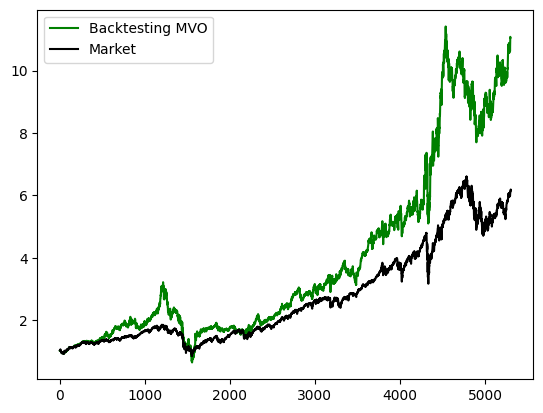

In [ ]:
plt.plot(investment_MVO_sliding, "green", label = "Backtesting MVO")
plt.plot(np.cumprod(1+np.array(final_df)), "black", label = "Market")
plt.legend()
plt.show()

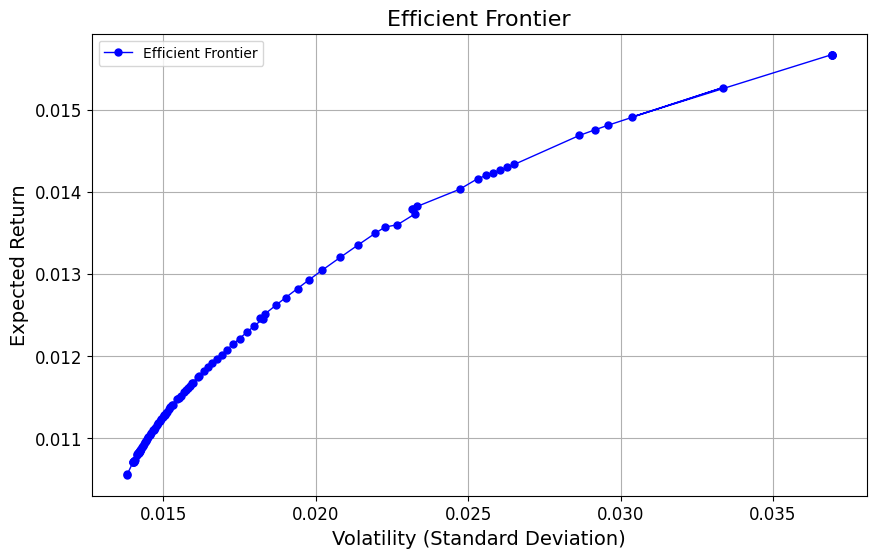

In [ ]:
#efficient frontier
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def optimize_portfolio(expected_returns, cov_matrix, risk_aversion, return_optimal_weights=False):
    num_assets = len(expected_returns)
    initial_weights = np.ones(num_assets) / num_assets

    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
    bounds = tuple((0, 1) for _ in range(num_assets))

    def objective_function(weights):
        return -(weights @ expected_returns - 0.5 * risk_aversion * (weights.T @ cov_matrix @ weights))

    result = minimize(objective_function, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)

    if return_optimal_weights:
        return result.x
    return -result.fun

def efficient_frontier(expected_returns, cov_matrix, risk_aversions):
    portfolio_returns = []
    portfolio_volatilities = []

    for aversion in risk_aversions:
        weights = optimize_portfolio(expected_returns, cov_matrix, aversion, return_optimal_weights=True)
        returns = weights @ expected_returns
        volatility = np.sqrt(weights.T @ cov_matrix @ weights)

        portfolio_returns.append(returns)
        portfolio_volatilities.append(volatility)

    portfolio_returns = np.array(portfolio_returns)
    portfolio_volatilities = np.array(portfolio_volatilities)

    return portfolio_returns, portfolio_volatilities


#array of risk aversion for exploration
risk_aversions = np.linspace(1, 50, 100)
portfolio_returns, portfolio_volatilities = efficient_frontier(expected_returns, cov_matrix, risk_aversions)
#plot
plt.figure(figsize=(10, 6))
plt.plot(portfolio_volatilities, portfolio_returns, color='blue', marker='o', linestyle='-', linewidth=1, markersize=5, label='Efficient Frontier')
plt.title('Efficient Frontier', fontsize=16)
plt.xlabel('Volatility (Standard Deviation)', fontsize=14)
plt.ylabel('Expected Return', fontsize=14)
plt.legend(loc='best')
#add a grid to improve readability
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


## Leveraged porfolios


Annualized returns :  7.886777819117796 %
Annualized volatility  :  32.340222173139466 %
Max drawdown :  -84.72244362609624 %
VaR -2.9625950584071568 %
Sharpe ratio :  0.24386900550325372


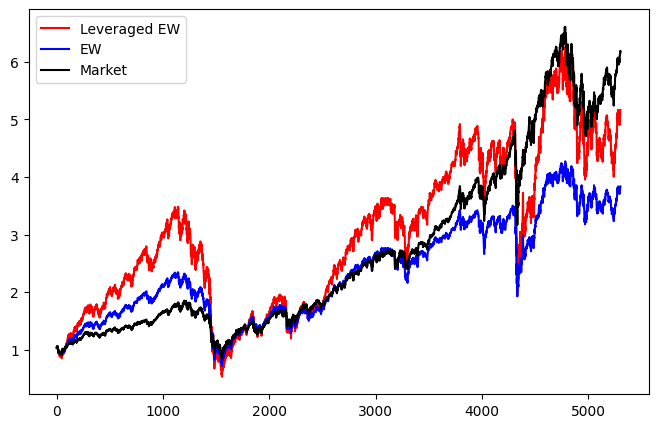

In [ ]:
# Leveraged EW

vec1 = np.ones(returns.shape[1])
r_EW_lev =[]

# Percentage of leverage allowed:
percent_lev = 50



for i in range(returns.shape[0]):
  r = []
  for j in range(returns.shape[1]):
    if returns[i,j] != 0:
      r.append(returns[i,j])
  w = (1 + (percent_lev / 100)) * np.ones(len(r)) / len(r)
  r_EW_lev.append(np.matmul(r,w))

r_EW_lev = np.array(r_EW_lev)
investment_EW_lev = np.cumprod(1+r_EW_lev)

# CAGR
print("Annualized returns : ", 100 * ((investment_EW_lev[-1]/investment_EW_lev[0])**(1/years) - 1), "%")

# Annualized volatility
print("Annualized volatility  : ", 100 * np.sqrt(252) * np.std(r_EW_lev), "%")

# Max drawdown
cum_max = np.maximum.accumulate(investment_EW_lev)
drawdown = (investment_EW_lev - cum_max)/cum_max
max_draw_down = drawdown.min()
print("Max drawdown : ", max_draw_down * 100, "%")

# VaR
print("VaR", 100 * np.quantile(r_EW_lev, 0.05), "%")

# Sharpe ratio
print("Sharpe ratio : ",  ((investment_EW_lev[-1]/investment_EW_lev[0])**(1/years) - 1)/ (np.sqrt(252) * np.std(r_EW_lev)))

plt.figure(figsize=(8,5))
plt.plot(investment_EW_lev, "red", label = "Leveraged EW")
plt.plot(investment_EW, "blue", label = "EW")
plt.plot(np.cumprod(1+np.array(final_df)), "black", label = "Market")
plt.legend()
plt.show()

In [ ]:
# Sliding leveraged MV
num_sliding = 400
delta_t = 20

# Percentage of leverage allowed:
percent_lev = 50

sum_t = 0

# Replacing the absent data with IV data. This happens because we need at least num_sliding prior prices to compute the covariance matrix.
r_MV_sliding_lev = r_IV[0:num_sliding]
num_non_inv = 0
num_inv = 0


while num_sliding+sum_t+delta_t < returns.shape[0]:

  # Checking if the elements on the num_sliding+sum_t row are non zero.
  valid_index = []
  for j in range(returns.shape[1]):
    if returns[num_sliding+sum_t,j] != 0:
      valid_index.append(j)

  # Keeping the column only if the previous num_sliding elements are non zero.
  valid_index2 = []
  for j in valid_index:
    for i in range(sum_t,num_sliding+sum_t):
      if returns[i,j] == 0:
        break;
      else:
        if i == num_sliding + sum_t - 1:
          valid_index2.append(j)

  final_vectors = []
  for j in valid_index2:
    final_vectors.append(returns[sum_t:num_sliding+sum_t,j])
  final_vectors = np.array(final_vectors).transpose()

  cov_mat = np.cov(final_vectors.transpose())

  # Checking if the covariance matrix is invertible.
  if np.linalg.matrix_rank(cov_mat) == cov_mat.shape[0]:
      cov_inv = np.linalg.inv(cov_mat)
      vec1 = np.ones(len(valid_index2))

      w_mv_lev = (1 + (percent_lev / 100)) *np.matmul(cov_inv,vec1)/np.matmul(vec1.transpose(),np.matmul(cov_inv,vec1))

      vectors = []
      for j in valid_index2:
        vectors.append(returns[num_sliding+sum_t:num_sliding+sum_t+delta_t,j])
      vectors = np.array(vectors).transpose()

      r_MV_lev = np.matmul(vectors,w_mv_lev)

      # Removing pathological cases.
      for i in r_MV_lev:
        if np.abs(i) > 0.2:
          r_MV_lev[r_MV_lev == i] = 0

      # Adding delta_t days of returns.
      r_MV_sliding_lev = np.concatenate([r_MV_sliding_lev, r_MV_lev])

      sum_t += delta_t
      num_inv += 1

  # Replacing absent data with neutral values if the covariance matrix is not inversible.
  else:
      r_MV_sliding_lev = np.concatenate([r_MV_sliding_lev, np.zeros(delta_t)])
      sum_t += delta_t
      num_non_inv += 1


print("Nombre de cas non inversibles : ", num_non_inv)
print("Nombre de cas inversibles : ", num_inv)
print("Pourcentage de cas non inversibles : ", 100*num_non_inv/(num_non_inv + num_inv), "%")

investment_MV_sliding_lev = np.cumprod(1+r_MV_sliding_lev)

# CAGR
print("Annualized returns : ", 100 * ((investment_MV_sliding_lev[-1]/investment_MV_sliding_lev[0])**(1/years) - 1), "%")

# Annualized volatility
print("Annualized volatility  : ", 100 * np.sqrt(252) * np.std(r_MV_sliding_lev), "%")

# Max drawdown
cum_max = np.maximum.accumulate(investment_MV_sliding_lev)
drawdown = (investment_MV_sliding_lev - cum_max)/cum_max
max_draw_down = drawdown.min()
print("Max drawdown : ", max_draw_down * 100, "%")

# VaR
print("VaR : ", 100 * np.quantile(r_MV_sliding_lev, 0.05), "%")

# Sharpe ratio
print("Sharpe ratio : ",  ((investment_MV_sliding_lev[-1]/investment_MV_sliding_lev[0])**(1/years) - 1)/ (np.sqrt(252) * np.std(r_MV_sliding_lev)))

Nombre de cas non inversibles :  0
Nombre de cas inversibles :  245
Pourcentage de cas non inversibles :  0.0 %
Annualized returns :  7.4660141087186105 %
Annualized volatility  :  23.101696569576788 %
Max drawdown :  -62.00347693441076 %
VaR :  -2.1447781938235977 %
Sharpe ratio :  0.32318033812939934


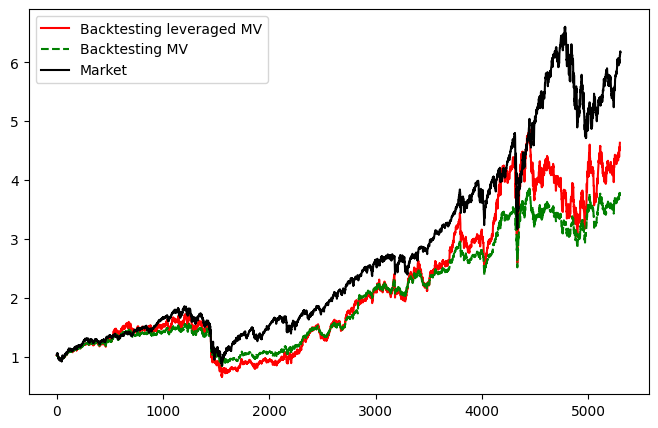

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(investment_MV_sliding_lev, "red", label = "Backtesting leveraged MV")
plt.plot(investment_MV_sliding, "g--", label = "Backtesting MV")
plt.plot(np.cumprod(1+np.array(final_df)), "black", label = "Market")
plt.legend()
plt.show()

## Top performers portfolio


In [ ]:
# Number of top performers we include in our portfolio. We take the num_performers_ret stocks with best returns.
# Out of those, we take the num_performers_ret_vol stocks who have the lowest volatility.
num_performers_ret = 300
num_performers_ret_vol = 80

# Number of days on which we compute the best performers ie: we take the titles with the best average return and lowest average volatility over the last num_sliding days.
num_sliding = 400

# We use the weights for delta_t days.
delta_t = 20

sum_t = 0


# Replacing the absent data with IV data. This happens because we need at least num_sliding prior prices to compute the covariance matrix.
r_TP = np.reshape(np.array(final_df), (np.array(final_df).shape[0],))[0:num_sliding]

while num_sliding+sum_t+delta_t < returns.shape[0]:

  # Taking the average return of all titles on the last num_sliding days.
  expected_returns = []
  for j in range(returns.shape[1]):
    expected_returns.append(np.mean(returns[sum_t : sum_t + num_sliding,j]))
  expected_returns = np.array(expected_returns)

  # Taking the num_performers_ret number of indices of those with the highest expected returns.
  top_performers_index_ret = np.argpartition(expected_returns,-num_performers_ret)[-num_performers_ret:]

  expected_vol = []
  for j in top_performers_index_ret:
    expected_vol.append(np.std(returns[sum_t : sum_t + num_sliding,j]))
  expected_vol = np.array(expected_vol)

  # Out of the previous selection, we take the num_performers_ret_vol number of indices of those with the lowest volatility.
  top_performers_index_ret_vol = np.argpartition(expected_vol, num_performers_ret_vol)[:num_performers_ret_vol]
  tp_index_final = []
  for index in top_performers_index_ret_vol:
    tp_index_final.append(top_performers_index_ret[index])
  tp_index_final = np.array(tp_index_final)


  # We create an equally weighted portfolio on the top performers.
  w_tp = np.ones(num_performers_ret_vol) / num_performers_ret_vol

  vectors = []
  for j in tp_index_final:
    vectors.append(returns[num_sliding+sum_t:num_sliding+sum_t+delta_t,j])
  vectors = np.array(vectors).transpose()


  #Adding delta_t days of returns.
  r_TP = np.concatenate([r_TP, np.matmul(vectors,w_tp)])

  sum_t += delta_t

investment_TP = np.cumprod(1+r_TP)

# CAGR
print("Annualized returns : ", 100 * ((investment_TP[-1]/investment_TP[0])**(1/years) - 1), "%")

# Annualized volatility
print("Annualized volatility : ", 100 * np.sqrt(252) * np.std(r_TP), "%")

#Max drawdown
cum_max = np.maximum.accumulate(investment_TP)
drawdown = (investment_TP - cum_max)/cum_max
max_draw_down = drawdown.min()
print("Max drawdown : ", max_draw_down * 100, "%")

#VaR
print("VaR", 100 * np.quantile(r_TP, 0.05), "%")

#Sharpe ratio
print("Sharpe ratio : ", ((investment_TP[-1]/investment_TP[0])**(1/years) - 1)/ (np.sqrt(252) * np.std(r_TP)))

# Tracking error
print("Tracking error", 100 * np.sqrt(np.sum(np.square(np.subtract(r_TP,np.delete(final_df, ([-i for i in range(1,final_df.shape[0]-r_TP.shape[0]+1)])))))/len(r_TP)), "%")

Annualized returns :  7.035897709703498 %
Annualized volatility :  12.700214898382349 %
Max drawdown :  -33.210261334889445 %
VaR -1.227197152638034 %
Sharpe ratio :  0.5539983193984909
Tracking error 0.689432311091748 %


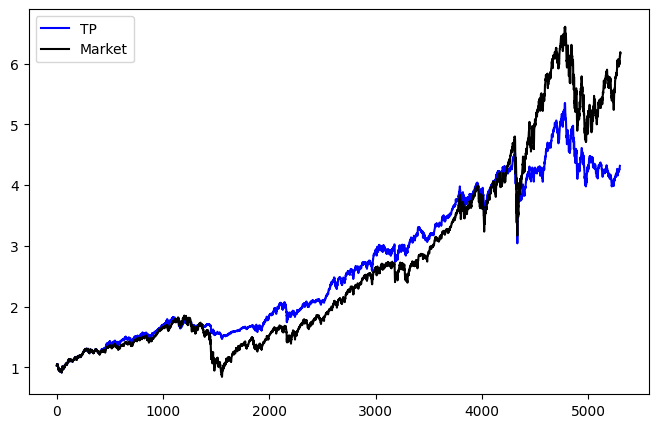

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(investment_TP, "blue", label = "TP")
plt.plot(np.cumprod(1+np.array(final_df)), "black", label = "Market")
plt.legend()
plt.show()